## Home Price Prediction Model
---
Dataset: [Home-Prices-Dataset](https://www.kaggle.com/datasets/prakharrathi25/home-prices-dataset)<br>
By guidence of [codeBasics](https://www.youtube.com/watch?v=J_LnPL3Qg70)

---
In this code, We will going to build **Linear Regression Model - Multi variables** for predicting Home prices using certain features. We will do following steps on datasets:
* Data Preprocessing
* Data Analysis for selecting features
* building Model and testing it

#### First we will import required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Loading dataset

In [10]:
df = pd.read_csv('homeprices.csv')

#### Data Preprocessing

In [12]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:
df.shape

(6, 4)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,6.0,3416.666667,587.934237,2600.0,3050.00,3400.0,3900.0,4100.0
bedrooms,5.0,4.200000,1.303840,3.0,3.00,4.0,5.0,6.0
age,6.0,16.500000,8.288546,8.0,9.75,16.5,19.5,30.0
price,6.0,648333.333333,109117.673484,550000.0,572500.00,602500.0,722500.0,810000.0


In [15]:
df.nunique()

area        6
bedrooms    4
age         5
price       6
dtype: int64

In [16]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

* Dataset contains NULL values in bedrooms column.We will fill Null as median of that column

In [17]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [18]:
df.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

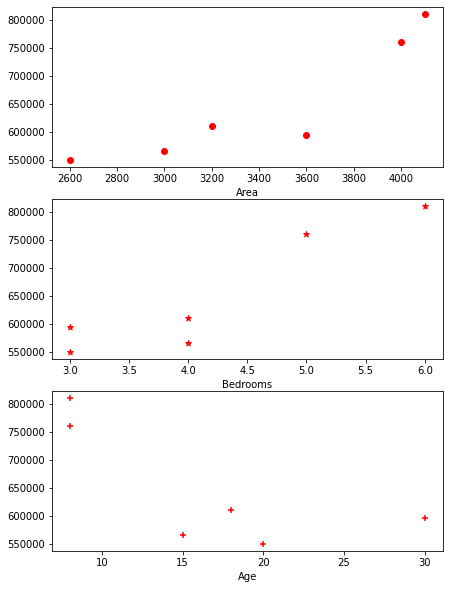

In [27]:
plt.figure(figsize=(7,10))
#fig1
plt.subplot(311)
plt.xlabel('Area')
plt.scatter(df.area,df.price , color='red')
#fig2
plt.subplot(312)
plt.xlabel('Bedrooms')
plt.scatter(df.bedrooms, df.price, color='red', marker='*')
#fig3
plt.subplot(313)
plt.xlabel('Age')
plt.scatter(df.age, df.price, color='red', marker='+')

## Creating Model

In [28]:
model = LinearRegression()

In [29]:
model.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [32]:
result = model.predict(df[['area','bedrooms','age']])
result

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

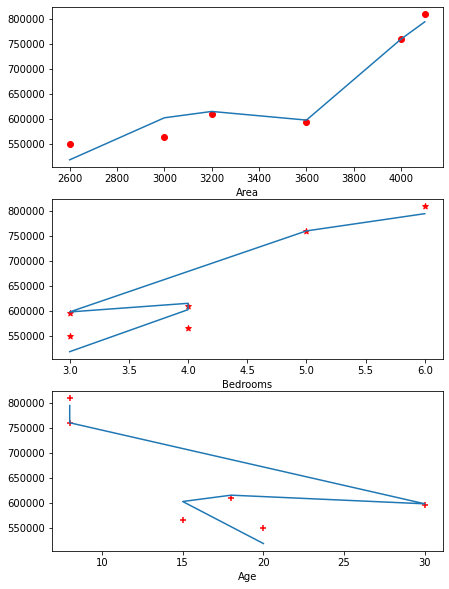

In [33]:
plt.figure(figsize=(7,10))
#fig1
plt.subplot(311)
plt.xlabel('Area')
plt.scatter(df.area,df.price , color='red')
plt.plot(df.area, result)
#fig2
plt.subplot(312)
plt.xlabel('Bedrooms')
plt.scatter(df.bedrooms, df.price, color='red', marker='*')
plt.plot(df.bedrooms, result)
#fig3
plt.subplot(313)
plt.xlabel('Age')
plt.scatter(df.age, df.price, color='red', marker='+')
plt.plot(df.age, result)

* We can see in graphs, our model is **Overfitted** which might not good real world data.